# Data modeling and fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Function  $ y = a_1\exp(\frac{-(x - \mu_1)^2}{2\sigma_1^2}) + a_2\exp(\frac{-(x - \mu_2)^2}{2\sigma_2^2}) $
Create a function to model

In [2]:
def func(x, a0, b0, c0, a1, b1, c1):
    return a0 * np.exp(-(x-b0)**2/(2*c0**2)) + a1 * np.exp(-(x-b1)**2/(2*c1**2))

### Data
Generating clean data

In [3]:
x = np.linspace(0, 20, 200)
y = func(x, 1, 3, 1, -2, 15, 0.5)

### Noise
Adding noise to the data

In [4]:
yn = y + 0.2 * np.random.normal(size=len(x))

### Data visualization
Plot data.

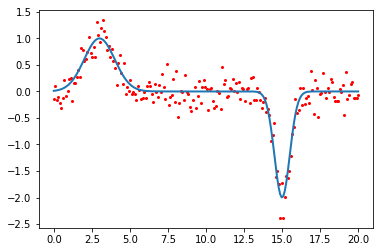

In [5]:
plt.plot(x, yn, 'ro', label='data', ms=2.0)
plt.plot(x, func(x, 1, 3, 1, -2, 15, 0.5), lw=2.0)
plt.show()

### Guesses
As a more complex model is fitting so providing guesses will lead to better results.

In [6]:
guesses = [1,3,1,1,15,1]

### Fit
Executing curve_fit on noisy data

In [7]:
popt, pcov = curve_fit(func, x, yn, p0=guesses)

### Best fit
Popt returns the best fit values for parameters of the given model (func).

In [8]:
print(popt)

[  1.07599761   2.99298511   0.89165719  -2.08489982  15.02514607
   0.49503642]


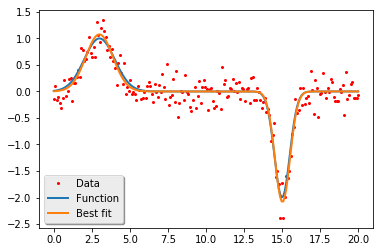

In [9]:
plt.plot(x, yn, 'ro', label='Data', ms=2.0)
plt.plot(x, func(x, 1, 3, 1, -2, 15, 0.5), label='Function', lw=2.0)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5]), label='Best fit', lw=2.0)
plt.legend(loc='lower left', shadow=True)
plt.show()